#### 1. Import libraries.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### 2. Load data.

In [8]:
models = ['CNN', 'ResNet-M', 'ResNet-L', 'ResNet-XL', 'ViT-S', 'ViT-M']
params = [1.18, 2.3, 12.9, 24.7, 2.64, 9.5]
elo = [1112, 1515, 1711, 1719, 1817, 1960]
arch = ['CNN', 'ResNet', 'ResNet', 'ResNet', 'ViT', 'ViT']

#### 3. Prepare parameters.

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12

colors = {
    'CNN': '#1f77b4',
    'ResNet': '#ff7f0e',
    'ViT': '#2ca02c'
}

#### 4. Plot the plot. ;-)

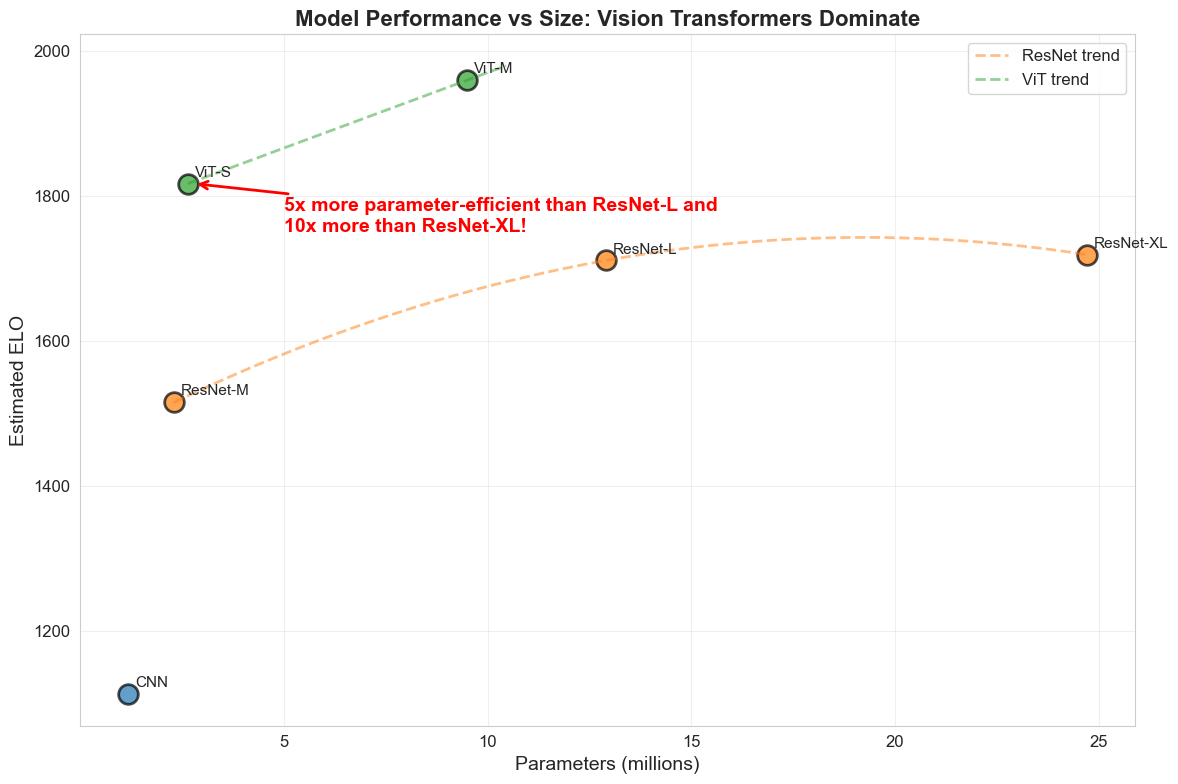

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot points
for model, param, e, a in zip(models, params, elo, arch):
    color = colors[a]
    ax.scatter(param, e, s=200, c=color, alpha=0.7, edgecolors='black', linewidth=2)
    ax.annotate(model, (param, e), xytext=(5, 5), textcoords='offset points', fontsize=11)

resnet_mask = [a == 'ResNet' for a in arch]
vit_mask = [a == 'ViT' for a in arch]

if sum(resnet_mask) > 1:
    resnet_params = [p for p, m in zip(params, resnet_mask) if m]
    resnet_elo = [e for e, m in zip(elo, resnet_mask) if m]
    z = np.polyfit(resnet_params, resnet_elo, 2)
    p = np.poly1d(z)
    x_line = np.linspace(min(resnet_params), max(resnet_params), 100)
    ax.plot(x_line, p(x_line), '--', color=colors['ResNet'], alpha=0.5, linewidth=2, label='ResNet trend')

if sum(vit_mask) > 1:
    vit_params = [p for p, m in zip(params, vit_mask) if m]
    vit_elo = [e for e, m in zip(elo, vit_mask) if m]
    z = np.polyfit(vit_params, vit_elo, 1)
    p = np.poly1d(z)
    x_line = np.linspace(min(vit_params), max(vit_params)*1.1, 100)
    ax.plot(x_line, p(x_line), '--', color=colors['ViT'], alpha=0.5, linewidth=2, label='ViT trend')

ax.annotate('5x more parameter-efficient than ResNet-L and\n10x more than ResNet-XL!', 
            xy=(2.8, 1817), xytext=(5, 1750),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=14, color='red', weight='bold')

ax.set_xlabel('Parameters (millions)', fontsize=14)
ax.set_ylabel('Estimated ELO', fontsize=14)
ax.set_title('Model Performance vs Size: Vision Transformers Dominate', fontsize=16, weight='bold')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()